In [1]:
try:
        
    import h5py

    import matplotlib.pyplot as mplt
    import numpy as np
    import seaborn as sns 
    import ipywidgets as widgets
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    import matplotlib.ticker as ticker
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


In [2]:
###### #### GUI 

edt_filename = widgets.Text(description = 'File name', value=' ORCHID_z_change')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename, btn_select,output_file)



def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    file_name = "\\"
    file_name = file_name + edt_filename.value 
    
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]

            total_steps = total_t /dt          
            interval_step = total_steps / intervals

            interval_arr = [round(interval_step * i) for i in range(intervals)]
            
            master_arr = []
            t_arr =[]
            
            print(intervals)
            print(interval_arr[0:5])
            print(total_steps)
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
                print(len(list(C_group.keys())))
                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])
                    
                    data_arr_2.append(data_arr)
            
                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         
                
                master_arr.append(data_arr_2)
                t_arr_bool = False
            
         
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value=' ORCHID_z_change', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

File found and content loaded into memory
1000
[0, 100000, 200000, 300000, 400000]
100000000.0
1000
1000


## EXTERNAL Z DECREASE 

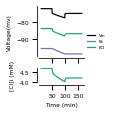

In [3]:
#################################################################
# DEFINE DATA

na_arr = [master_arr[0][i][3]*1e3 for i in range(len(t_arr))]
k_arr = [master_arr[0][i][4]*1e3 for i in range(len(t_arr))]
cl_arr = [master_arr[0][i][5]*1e3 for i in range(len(t_arr))]
x_arr = [master_arr[0][i][6]*1e3 for i in range(len(t_arr))]
z_arr = [master_arr[0][i][7] for i in range(len(t_arr))]
nao_arr = [master_arr[1][i][3]*1e3 for i in range(len(t_arr))]
ko_arr = [master_arr[1][i][4]*1e3 for i in range(len(t_arr))]
clo_arr = [master_arr[1][i][5]*1e3 for i in range(len(t_arr))]
xo_arr = [master_arr[1][i][6]*1e3 for i in range(len(t_arr))]
zo_arr = [master_arr[1][i][7] for i in range(len(t_arr))]
volo_arr = [master_arr[1][i][2]*1e15 for i in range(len(t_arr))]

vm_arr = [master_arr[0][i][-3]*1e3 for i in range(len(t_arr))]
ek_arr = [master_arr[0][i][-2]*1e3 for i in range(len(t_arr))]
ecl_arr = [master_arr[0][i][-1]*1e3 for i in range(len(t_arr))]
df_arr = [master_arr[0][i][-3]*1e3 - master_arr[0][i][-1]*1e3 for i in range(len(t_arr))] 

vol_arr = [master_arr[0][i][2]*1e13 for i in range(len(t_arr))]

####################################################################
# SET TIMING BUFFER

tmin_arr = [t_arr[i]/60 for i in range(len(t_arr))]
buffer = 50
####################################################################
# DEFINE FIGURE AND AXES 

f1, [ax_1A, ax_2A] = mplt.subplots(2,1, gridspec_kw={ 'height_ratios': [1, 0.3]}, figsize=(0.8,1.4), sharex=True)
sns.set_context('paper')
col_arr= [ '#e7298a', '#1b9e77', '#7570b3' ,'#FF5800']

###################################################################



sns.despine(ax = ax_1A, offset=2)


ax_1A.plot(tmin_arr[buffer:], vm_arr[buffer:],color='#000000', label ='Vm')
ax_1A.plot(tmin_arr[buffer:], ek_arr[buffer:],color=col_arr[2], label='Ek')
ax_1A.plot(tmin_arr[buffer:], ecl_arr[buffer:], color=col_arr[1], label='ECl')
ax_1A.tick_params(axis='both', which='major', labelsize=6)

ax_1A.legend(bbox_to_anchor=(1,0.06), loc = 'lower left', frameon=False,fontsize=4)

ax_1A.set_ylabel("Voltage(mv)",fontsize=6)


sns.set_context('paper')

#####################################################################



sns.despine(ax = ax_2A, offset=2)

sns.set_context('paper')
ax_2A.plot(tmin_arr[buffer:], cl_arr[buffer:],color=col_arr[1], label = '[Cl]i')


ax_2A.set_ylabel("[Cl]i (mM)",fontsize=6)

ax_2A.set_xlabel("Time (min)",fontsize=6)

ax_2A.tick_params(axis='both', which='major', labelsize=6)


mplt.subplots_adjust(hspace=0.35) 

#######################################

#f1.savefig('ORCHID_z_change.svg', dpi=2000, bbox_inches='tight')

In [12]:
start_int = 300


print(f"Initial time point @ {round(t_arr[start_int])} s")
print("")

print(f"[X]o: {round(xo_arr[start_int],2)} mM ----> {round(xo_arr[-1],2)} mM ({round(xo_arr[-1]-xo_arr[start_int],2)})" )
print(f"zo: {round(zo_arr[start_int],2)}  ----> {round(zo_arr[-1],2) }  ({round(zo_arr[-1]-zo_arr[start_int],2)})" )
print(f"----------------------------------------- " )

print(f"[Na]i: {round(na_arr[start_int],2)} mM ----> {round(na_arr[-1],2)} mM ({round(na_arr[-1]-na_arr[start_int],2)})" )
print(f"[K]i: {round(k_arr[start_int],2)} mM ----> {round(k_arr[-1],2) } mM ({round(k_arr[-1]-k_arr[start_int],2)})"  )
print(f"[Cl]i: {round(cl_arr[start_int],2)} mM ----> {round(cl_arr[-1],2)} mM ({round(cl_arr[-1]-cl_arr[start_int],2)})"  )
print(f"[X]i: {round(x_arr[start_int],2)} mM ----> {round(x_arr[-1],2)} mM ({round(x_arr[-1]-x_arr[start_int],2)})" )
print(f"----------------------------------------- " )
print(f"[Na]o: {round(nao_arr[start_int],2)} mM ----> {round(nao_arr[-1],2)} mM ({round(nao_arr[-1]-nao_arr[start_int],2)})" )
print(f"[K]o: {round(ko_arr[start_int],2)} mM ----> {round(ko_arr[-1],2) } mM ({round(ko_arr[-1]-ko_arr[start_int],2)})" )
print(f"[Cl]o: {round(clo_arr[start_int],2)} mM ----> {round(clo_arr[-1],2)} mM ({round(clo_arr[-1]-clo_arr[start_int],2)})")
print(f"----------------------------------------- " )
print(f"Vm: {round(vm_arr[start_int],2)} mV ----> {round(vm_arr[-1],2)} mV ({round(vm_arr[-1]-vm_arr[start_int],2)})" )
print(f"EK: {round(ek_arr[start_int],2)} mV ----> {round(ek_arr[-1],2)} mV ({round(ek_arr[-1]-ek_arr[start_int],2)})" )
print(f"ECl: {round(ecl_arr[start_int],2)} mV ----> {round(ecl_arr[-1],2)} mV ({round(ecl_arr[-1]-ecl_arr[start_int],2)})" )
print(f"DF-Cl: {round(df_arr[start_int],2)} mv ----> {round(df_arr[-1],2)} mV ({round(df_arr[-1]-df_arr[start_int],2)})" )
print(f"----------------------------------------- " )
print(f"Volume: {round(vol_arr[start_int],2)} pL ----> {round(vol_arr[-1],2)} pL ({round(vol_arr[-1]-vol_arr[start_int],2)})" )
osmoi = round(na_arr[-1],2) + round(k_arr[-1],2) + round(cl_arr[-1],2) + round(x_arr[-1],2)
osmoo = round(nao_arr[-1],2) + round(ko_arr[-1],2) + round(clo_arr[-1],2) + round(xo_arr[-1],2)
osmo_diff = round((osmoi - osmoo),2)
print(f"Final osmo = {osmo_diff} mM")
electroi = round(na_arr[-1],2) + round(k_arr[-1],2) - round(cl_arr[-1],2) + (round(x_arr[-1],2)*z_arr[-1])
electroo = round(nao_arr[-1],2) + round(ko_arr[-1],2) - round(clo_arr[-1],2) + (round(xo_arr[-1],2)*zo_arr[-1])
electro_diff = round((electroi - electroo),2) 
print(f"Final electro = {electro_diff} mV")

Initial time point @ 3000 s

[X]o: 40.5 mM ----> 40.5 mM (0.0)
zo: -1.0  ----> -1.0  (0.0)
----------------------------------------- 
[Na]i: 14.0 mM ----> 14.09 mM (0.09)
[K]i: 122.83 mM ----> 137.93 mM (15.09)
[Cl]i: 4.69 mM ----> 4.21 mM (-0.48)
[X]i: 155.47 mM ----> 140.78 mM (-14.7)
----------------------------------------- 
[Na]o: 145.0 mM ----> 145.0 mM (0.0)
[K]o: 3.5 mM ----> 3.5 mM (0.0)
[Cl]o: 108.0 mM ----> 108.0 mM (0.0)
----------------------------------------- 
Vm: -72.59 mV ----> -75.26 mV (-2.68)
EK: -95.1 mV ----> -98.19 mV (-3.1)
ECl: -83.84 mV ----> -86.73 mV (-2.89)
DF-Cl: 11.26 mv ----> 11.46 mV (0.21)
----------------------------------------- 
Volume: 19.56 pL ----> 21.61 pL (2.04)
Final osmo = 0.01 mM
Final electro = -0.01 mV


In [15]:
print(max(vm_arr[buffer:]))

-58.89999865507036


In [6]:
len(t_arr)

1000